In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn

import konlpy
from konlpy.tag import Twitter, Okt

import gensim
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
from gensim import corpora, models
from gensim.models import LdaMulticore
from gensim.models import Word2Vec
from gensim.corpora import Dictionary, MmCorpus

import pyLDAvis
import pyLDAvis.gensim
import pickle

from wordcloud import WordCloud
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

from os import path
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource

Duplicate key in file WindowsPath('c:/Users/god12/Anaconda3/envs/wassup/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family:  sans-serif')


In [19]:
#df = pd.read_csv('발라드_4841곡_240402.csv')
#df = pd.read_csv('알앤비_4927곡_240402.csv')
df = pd.read_csv('인디_5000곡_240402.csv')
print(len(df))
df.head()

5000


,Unnamed: 0,Title,Likes,Singer,Lyrics
0,0,인사,"105,245",범진,돌아서는 너를 보며\r\n난 아무 말도 할 수 없었고\r\n슬퍼하기엔 짧았던\r\n...
1,1,주저하는 연인들을 위해,"415,001",잔나비,나는 읽기 쉬운 마음이야\r\n당신도 스윽 훑고 가셔요\r\n달랠 길 없는 외로운 ...
2,2,사랑할 수밖에,"35,768",볼빨간사춘기,간지러웠어 널 보는 내 손이\r\n다 주고 싶었어 내 안에 남은 사랑까지\r\n지켜...
3,3,그대가 내 안에 박혔다(그내박),"38,463",순순희(기태),한참을 하늘을 보고 걸어 갔어\r\n내 지난 사랑은 온통 미련으로 가득한데\r\n사...
4,4,해요 (2022),"97,213",#안녕,그녀와 나는요 그땐 참 어렸어요\r\n많이 사랑했고 때론 많이 다퉜었죠\r\n지금 ...


In [20]:
lyrics = df.Lyrics.to_list()
print(len(lyrics))
print(lyrics[0])
#file_name = 'song_ballad_text.txt'
#file_name = 'song_rnb_text.txt'
file_name = 'song_indi_text.txt'
with open(file_name, 'w') as file:
    file.write('\n'.join(lyrics))

5000
돌아서는 너를 보며
난 아무 말도 할 수 없었고
슬퍼하기엔 짧았던
나의 해는 저물어 갔네
지나치는 모진 기억이
바람 따라 흩어질 때면
아무 일도 없듯이 보내주려 해
아픈 맘이 남지 않도록
안녕 멀어지는 나의 하루야
빛나지 못한 나의 별들아
차마 아껴왔던 말 이제서야
잘 지내 인사를 보낼 게
떠나가는 너를 보며
난 아무 말도 할 수 없었고
슬퍼하기엔 짧았던
나의 해는 저물어 갔네
돌이킬 순 없는 추억이
바람 따라 흩어질 때면
아무 일도 없듯이 보내주려 해
아픈 맘이 남지 않도록
안녕 멀어지는 나의 하루야
빛나지 못한 나의 별들아
차마 아껴왔던 말 이제서야
잘 지내 인사를 보낼 게
잘 지내 인사를 보낼 게


In [21]:
with open('song_indi_text.txt', 'r') as f:
    lyrics = f.read()
print(lyrics[:50])

돌아서는 너를 보며

난 아무 말도 할 수 없었고

슬퍼하기엔 짧았던

나의 해는 저물어 


In [22]:
okt = Okt()

stop_words = ['\n', '?', '.', ',', '!', '\r', "'"]
def normalize(lyric):
    nouns = okt.nouns(lyric)
    lyric_noun = [noun for noun in nouns if len(noun) > 1 and noun not in stop_words]
    return lyric_noun

In [23]:
normalized_text = normalize(lyrics)

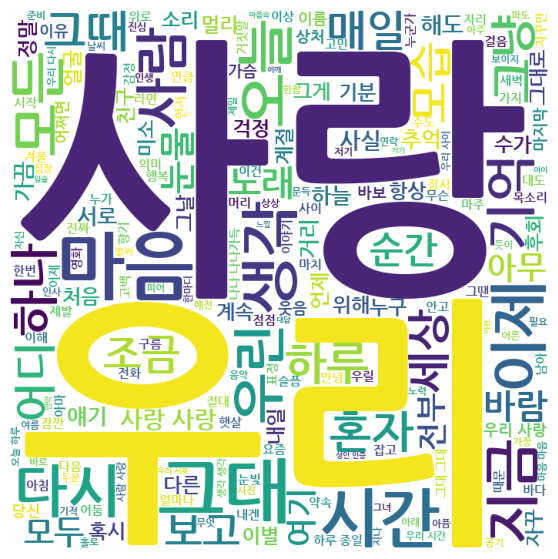

In [24]:
text = ' '.join(normalized_text)
wc = WordCloud(font_path = 'NanumGothicBold.ttf', width = 700, height = 700, background_color = 'white').generate(text)
#wc.to_file('wc/ballad_wc.png')
#wc.to_file('wc/rnb_wc.png')
wc.to_file('wc/indi_wc.png')
plt.figure(figsize = (7, 7))
plt.axis('off')
plt.imshow(wc)
plt.show()